In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (9, 7)
plt.rcParams['font.size'] = 14

### Import dateset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data_clean.csv to data_clean.csv


In [ ]:
df = pd.read_csv("/content/data_clean.csv", index_col=0)
df

,SEQN,Gender,Age,Race,CountryofBirth,Education,FamIncomeRatio,Weight,Height,BMI,Diabetes,ModerateWorkActivity,ModerateRecreationalActivities,Depressed,PoorAppetiteOvereating,Smoking,SleepHoursWeekdays,SleepHoursWeekend
1,109264,2,13,1,1,NaN,0.83,42.2,154.7,17.6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,109265,1,2,3,1,NaN,3.06,12.0,89.3,15.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,109266,2,29,6,2,5.0,5.00,97.1,160.2,37.8,2,2.0,1.0,5.397605e-79,5.397605e-79,NaN,7.5,8.0
7,109270,2,11,4,1,NaN,1.88,75.3,156.0,30.9,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,109271,1,49,3,1,2.0,NaN,98.8,182.3,29.7,2,1.0,2.0,1.000000e+00,5.397605e-79,1.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15555,124818,1,40,4,1,5.0,3.82,108.8,168.7,38.2,2,2.0,2.0,5.397605e-79,5.397605e-79,NaN,6.0,7.0
15556,124819,1,2,4,1,NaN,0.07,15.4,93.7,17.5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15557,124820,2,7,3,1,NaN,1.22,22.9,123.3,15.1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15558,124821,1,63,4,1,2.0,3.71,79.5,176.4,25.5,3,2.0,2.0,5.397605e-79,5.397605e-79,NaN,8.0,9.0


In [ ]:
df.shape

(13137, 18)

#### Filter the age, extract respondents from 20-60 years old.


In [ ]:
# Filter the age, extract respondents from 20-60 years old.
df_age_filter = df[(df['Age'] >= 20) & (df['Age'] <= 60)]
print(df_age_filter.head())
print(df_age_filter.shape)

      SEQN  Gender  Age  ...  Smoking  SleepHoursWeekdays  SleepHoursWeekend
3   109266       2   29  ...      NaN                 7.5                8.0
8   109271       1   49  ...      1.0                10.0               13.0
10  109273       1   36  ...      1.0                 6.5                8.0
21  109284       2   44  ...      NaN                 8.0               10.0
23  109286       2   33  ...      NaN                 8.5                9.0

[5 rows x 18 columns]
(5556, 18)


#### Check if there is any null values

In [ ]:
df_age_filter.isnull().sum()

SEQN                                 0
Gender                               0
Age                                  0
Race                                 0
CountryofBirth                       0
Education                            0
FamIncomeRatio                     755
Weight                               0
Height                               0
BMI                                  0
Diabetes                             0
ModerateWorkActivity                 0
ModerateRecreationalActivities       0
Depressed                          346
PoorAppetiteOvereating             346
Smoking                           3470
SleepHoursWeekdays                  41
SleepHoursWeekend                   48
dtype: int64

#### Fill in missing values with mean and median values.

In [ ]:
df_age_filter['FamIncomeRatio'].fillna(df_age_filter['FamIncomeRatio'].mean(), inplace=True)
df_age_filter['Depressed'].fillna(df_age_filter['Depressed'].median(), inplace=True)
df_age_filter['PoorAppetiteOvereating'].fillna(df_age_filter['PoorAppetiteOvereating'].median(), inplace=True)
df_age_filter['Smoking'].fillna(df_age_filter['Smoking'].median(), inplace=True)
df_age_filter['SleepHoursWeekdays'].fillna(df_age_filter['SleepHoursWeekdays'].mean(), inplace=True)
df_age_filter['SleepHoursWeekend'].fillna(df_age_filter['SleepHoursWeekend'].mean(), inplace=True)

In [ ]:
df_age_filter.isnull().any()

SEQN                              False
Gender                            False
Age                               False
Race                              False
CountryofBirth                    False
Education                         False
FamIncomeRatio                    False
Weight                            False
Height                            False
BMI                               False
Diabetes                          False
ModerateWorkActivity              False
ModerateRecreationalActivities    False
Depressed                         False
PoorAppetiteOvereating            False
Smoking                           False
SleepHoursWeekdays                False
SleepHoursWeekend                 False
dtype: bool

- Now we filled the missing values, we have no null values in our dataset.

#### Creating a column indicates the weight level based on CDC BMI guideline.

In [ ]:
obese_condition = [(df_age_filter['BMI'] < 18.5),
                   (df_age_filter['BMI'] >= 18.5) & (df_age_filter['BMI'] < 25.0),
                   (df_age_filter['BMI'] >= 25.0) & (df_age_filter['BMI'] < 30.0),
                   (df_age_filter['BMI'] > 30.0)]

# 1 - Under Weight
# 2 - Healthy
# 3 - Overweight
# 4 - Obese
obese_value = [1, 2, 3, 4]

df_age_filter['obesity'] = np.select(obese_condition, obese_value, default = 1)

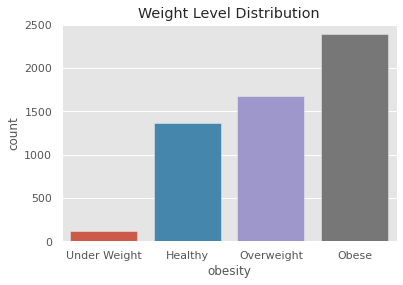

In [ ]:
# Obesity distribution plot
sns.countplot(x='obesity', data=df_age_filter)
plt.title('Weight Level Distribution')
positions=(0, 1, 2, 3)
labels=("Under Weight", "Healthy", "Overweight", "Obese")
plt.xticks(positions, labels)
plt.show();

- From this distribution plot of weight level, we can see that our data are not balanced. We have majority of the respondents in the overweight and obese level.

In [ ]:
import collections
from collections import Counter

In [ ]:
count = Counter(df_age_filter['obesity'])
print(count)

Counter({4: 2392, 3: 1676, 2: 1365, 1: 123})


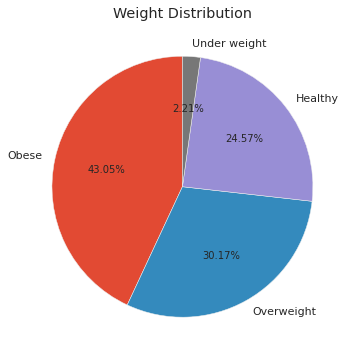

In [ ]:
plt.figure(figsize=(6, 6))
labels = ['Obese','Overweight', 'Healthy', 'Under weight']
plt.pie([float(count[v]) for v in count], labels=labels, startangle = 90, autopct='%1.2f%%')

plt.title('Weight Distribution')
plt.show()

- From the pie plot, we can see that Obese group contains 43.05% of the respondents data(20~60 years old), 30.17% of them are overweight.
- To make the data balanced, we choose to combine respondents in the underweight, healthy, and overweight level as "Not Obese", and keep the "Obese" group the same.

In [ ]:
# Second Weight Level Column
obese_condition_2 = [(df_age_filter['BMI'] < 30.0),
                   (df_age_filter['BMI'] > 30.0)]

# 1 - Not Obese
# 2 - Obese
obese_value_2 = [1, 2]

df_age_filter['obesity2'] = np.select(obese_condition_2, obese_value_2, default = 1)

In [ ]:
df_age_filter.drop(['obesity'], axis=1, inplace=True)

In [ ]:
df_age_filter.head()

,SEQN,Gender,Age,Race,CountryofBirth,Education,FamIncomeRatio,Weight,Height,BMI,Diabetes,ModerateWorkActivity,ModerateRecreationalActivities,Depressed,PoorAppetiteOvereating,Smoking,SleepHoursWeekdays,SleepHoursWeekend,obesity2
3,109266,2,29,6,2,5.0,5.000000,97.1,160.2,37.8,2,2.0,1.0,5.397605e-79,5.397605e-79,2.0,7.5,8.0,2
8,109271,1,49,3,1,2.0,2.582679,98.8,182.3,29.7,2,1.0,2.0,1.000000e+00,5.397605e-79,1.0,10.0,13.0,1
10,109273,1,36,3,1,4.0,0.830000,74.3,184.2,21.9,2,2.0,1.0,2.000000e+00,2.000000e+00,1.0,6.5,8.0,1
21,109284,2,44,1,2,2.0,2.582679,91.1,152.7,39.1,2,2.0,2.0,5.397605e-79,5.397605e-79,2.0,8.0,10.0,2
23,109286,2,33,6,2,5.0,1.360000,72.6,158.4,28.9,2,2.0,2.0,5.397605e-79,5.397605e-79,2.0,8.5,9.0,1


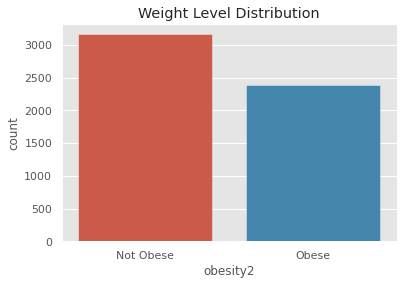

In [ ]:
# Obesity distribution plot
sns.countplot(x='obesity2', data=df_age_filter)
plt.title('Weight Level Distribution')
positions=(0, 1)
labels=("Not Obese", "Obese")
plt.xticks(positions, labels)
plt.show();

- Now we can see that the data are more balanced.

### Now we check the correlation

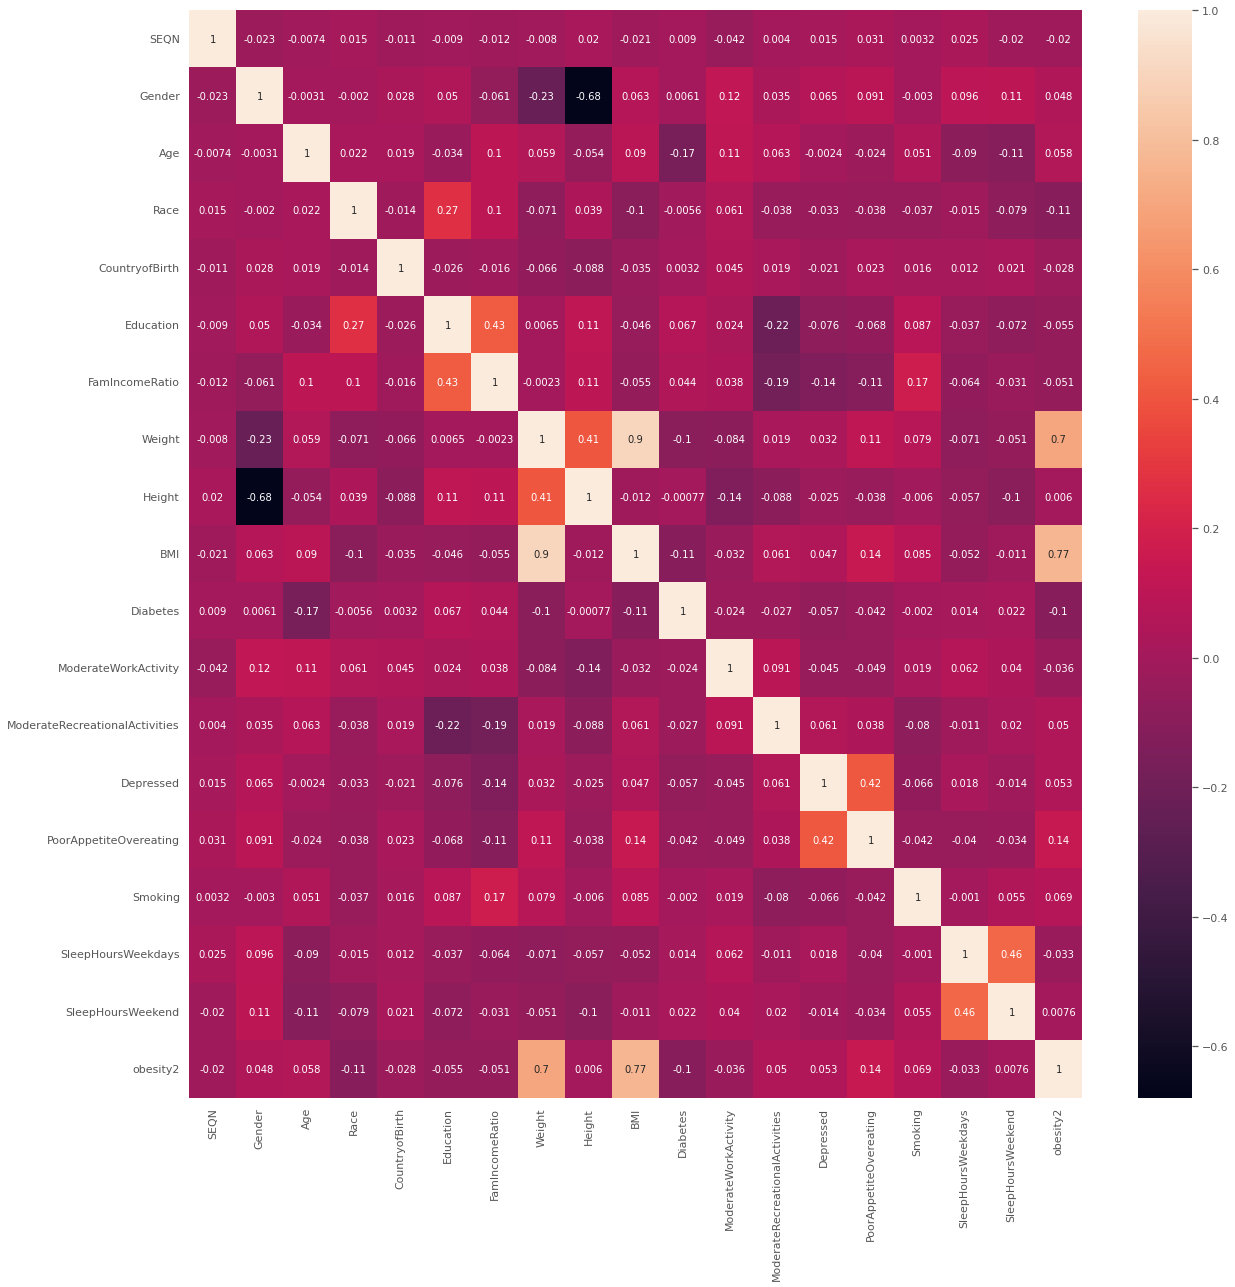

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df_age_filter.corr(), annot=True);

- Obesity is highly correlated to Weight and BMI, we decided to drop both of them to get a better idea of how other factors effect obesity level.

In [ ]:
df_age_filter.drop(['BMI'], axis=1, inplace=True)
df_age_filter.drop(['Weight'], axis=1, inplace=True)
df_age_filter.drop(['SEQN'], axis=1, inplace=True) #Drop the ID column

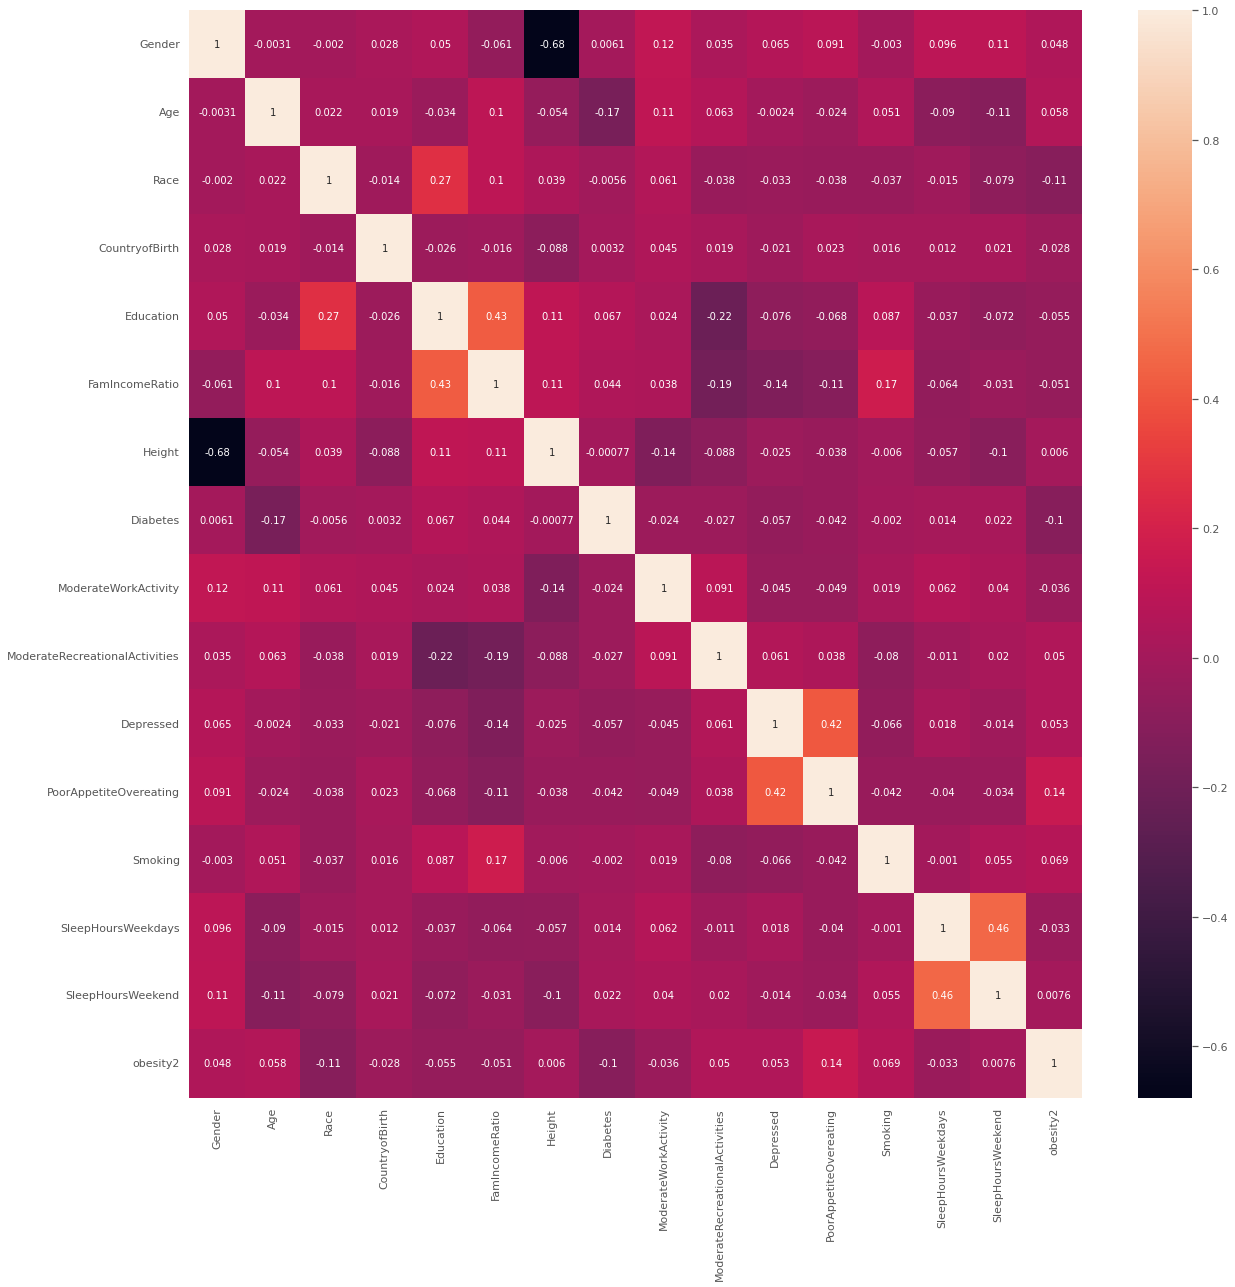

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df_age_filter.corr(), annot=True);

- After removing BMI and Weight, we can see that obesity level is positively correlated to PoorAppetite/Overeating. And it is negatively correlated to Diabetes, and Race etc. 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

### Normalizing data
- Normalize data using MinMaxScaler, because our data are measured in different scales for each column. We need to normalize the data in order to construct and run the models.

In [ ]:
#normalizing the data
scaler = MinMaxScaler(feature_range = (0,1))
normalized_data = scaler.fit_transform(df_age_filter)
columns = ['Gender',	'Age',	'Race',	'CountryofBirth',	'Education',	'FamIncomeRatio', 'Height',	'Diabetes',	'ModerateWorkActivity', 'ModerateRecreationalActivities',	'Depressed',	'PoorAppetiteOvereating',	'Smoking',	'SleepHoursWeekdays',	'SleepHoursWeekend', 'obesity2']
normalized_df = pd.DataFrame(normalized_data, columns=columns)
normalized_df['obesity2'] = normalized_df['obesity2'].astype(int)
normalized_df.head()

,Gender,Age,Race,CountryofBirth,Education,FamIncomeRatio,Height,Diabetes,ModerateWorkActivity,ModerateRecreationalActivities,Depressed,PoorAppetiteOvereating,Smoking,SleepHoursWeekdays,SleepHoursWeekend,obesity2
0,1.0,0.225,0.833333,0.010204,0.500,1.000000,0.424818,0.125,0.125,0.0,0.000000,0.000000,0.5,0.458333,0.500000,1
1,0.0,0.725,0.333333,0.000000,0.125,0.516536,0.747445,0.125,0.000,1.0,0.142857,0.000000,0.0,0.666667,0.916667,0
2,0.0,0.400,0.333333,0.000000,0.375,0.166000,0.775182,0.125,0.125,0.0,0.285714,0.222222,0.0,0.375000,0.500000,0
3,1.0,0.600,0.000000,0.010204,0.125,0.516536,0.315328,0.125,0.125,1.0,0.000000,0.000000,0.5,0.500000,0.666667,1
4,1.0,0.325,0.833333,0.010204,0.500,0.272000,0.398540,0.125,0.125,1.0,0.000000,0.000000,0.5,0.541667,0.583333,0


## Modeling

#### Splitting data to test and train data

In [ ]:
# splitting test and train data
X = normalized_df.iloc[:, :-1]
Y = normalized_df.iloc[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

#### Baseline model

In [ ]:
# Baseline classification accuracy
from sklearn.dummy import DummyClassifier

baseline_classifier = DummyClassifier(strategy='most_frequent')
baseline_classifier.fit(X_train,Y_train)
baseline_acc = baseline_classifier.score(X_test,Y_test)
print('Baseline accuracy = ', baseline_acc)

Baseline accuracy =  0.5764388489208633


- The baseline accuracy is 57.64%, which indicates the lowest possible prediction we can get. We expecting get high accuracy from the models we selected.

### SVM Model

In [ ]:
# SVM Model
svm_clf = SVC(kernel='rbf')
svm_clf.fit(X_train, Y_train)

# Predicting the Test set results
Y_pred_svm = svm_clf.predict(X_test)

In [ ]:
# accuracy calculation
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred_svm))

Accuracy: 0.6348920863309353


In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score

cv_svm = cross_val_score(svm_clf, X, Y, scoring='accuracy', cv=10)
cv_svm = pd.Series(cv_svm)
cv_svm.mean()

0.6090615075507162

- Auccracy of SVM is 63.49%, and the cross-validation score is 60.91%. 

In [ ]:
# classification report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.63      0.87      0.73       641
           1       0.64      0.32      0.43       471

    accuracy                           0.63      1112
   macro avg       0.64      0.59      0.58      1112
weighted avg       0.64      0.63      0.60      1112



- The recall rate of SVM model is 32%, and the false positive rate is 87% which indicates the model does not have a good fit.

### Logistic Regression Model
- Using Logit from statsmodels


In [ ]:
# splitting test and train data
X = normalized_df.iloc[:, :-1]
Y = normalized_df.iloc[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [ ]:
import statsmodels.api as sm

logit_model = sm.Logit(Y,X)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.653651
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               obesity2   No. Observations:                 5556
Model:                          Logit   Df Residuals:                     5541
Method:                           MLE   Df Model:                           14
Date:                Thu, 18 Nov 2021   Pseudo R-squ.:                 0.04362
Time:                        23:45:28   Log-Likelihood:                -3631.7
converged:                       True   LL-Null:                       -3797.3
Covariance Type:            nonrobust   LLR p-value:                 3.476e-62
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Gender                             0.3239      0.070      4.636     

- From the summary, we can see that the p-values for CountryofBirth, Education, Depressed, and SleepHoursWeekend are greater than the significant level 0.05. Other p-values are all less than 0.05. 
- We decided to remove these four factors from the dataset. 

In [ ]:
cols = ['Gender', 'Age', 'Race', 'FamIncomeRatio','Height','Diabetes','ModerateWorkActivity',
        'ModerateRecreationalActivities', 'PoorAppetiteOvereating', 'Smoking', 'SleepHoursWeekdays','obesity2']
df_1 = normalized_df[cols]
df_1

,Gender,Age,Race,FamIncomeRatio,Height,Diabetes,ModerateWorkActivity,ModerateRecreationalActivities,PoorAppetiteOvereating,Smoking,SleepHoursWeekdays,obesity2
0,1.0,0.225,0.833333,1.000000,0.424818,0.125,0.125,0.0,0.000000,0.5,0.458333,1
1,0.0,0.725,0.333333,0.516536,0.747445,0.125,0.000,1.0,0.000000,0.0,0.666667,0
2,0.0,0.400,0.333333,0.166000,0.775182,0.125,0.125,0.0,0.222222,0.0,0.375000,0
3,1.0,0.600,0.000000,0.516536,0.315328,0.125,0.125,1.0,0.000000,0.5,0.500000,1
4,1.0,0.325,0.833333,0.272000,0.398540,0.125,0.125,1.0,0.000000,0.5,0.541667,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5551,1.0,0.075,0.000000,0.868000,0.378102,0.125,0.000,1.0,0.222222,0.5,0.416667,0
5552,1.0,0.900,0.500000,0.386000,0.529927,0.125,0.000,1.0,0.000000,0.5,0.500000,1
5553,1.0,0.575,0.500000,0.516536,0.545985,0.125,0.125,1.0,0.000000,0.5,0.500000,0
5554,0.0,0.800,0.500000,1.000000,0.696350,0.125,0.125,0.0,0.000000,1.0,0.333333,0


In [ ]:
# splitting test and train data
X1 = df_1.iloc[:, :-1]
Y1 = df_1.iloc[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size = 0.2, random_state = 2)

In [ ]:
logit_model1 = sm.Logit(Y1,X1)
result1 = logit_model1.fit()
print(result1.summary())

Optimization terminated successfully.
         Current function value: 0.654673
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               obesity2   No. Observations:                 5556
Model:                          Logit   Df Residuals:                     5545
Method:                           MLE   Df Model:                           10
Date:                Thu, 18 Nov 2021   Pseudo R-squ.:                 0.04212
Time:                        23:45:28   Log-Likelihood:                -3637.4
converged:                       True   LL-Null:                       -3797.3
Covariance Type:            nonrobust   LLR p-value:                 9.558e-63
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Gender                             0.3171      0.066      4.814     

- All the p-values are smaller than 0.05
- We now use Logistic Regression Model to fit and predict our data.

In [ ]:
#Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)
Y_pred = log_reg.predict(X_test)

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.6169064748201439


In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score

cv_logreg = cross_val_score(log_reg, X, Y, scoring='accuracy', cv=10)
cv_logreg = pd.Series(cv_logreg)
cv_logreg.mean()

0.6061812171884113

- The accuracy is 61.69%, cross-validation is 60.62%, the accuracy and cross-validation score are not high, but they are close to each other.

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[517 124]
 [302 169]]


- From this result, we have 517 + 169 correct prediction, and 302 + 124 incorrect prediction by using logistic regression model.

In [ ]:
# classification report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.63      0.81      0.71       641
           1       0.58      0.36      0.44       471

    accuracy                           0.62      1112
   macro avg       0.60      0.58      0.58      1112
weighted avg       0.61      0.62      0.60      1112



- The recall rate is 36%, and the false positive rate is 71%. Which shows this is not a good model for our dataset.

### Decision Tree Model

In [ ]:
# splitting test and train data
X = normalized_df.iloc[:, :-1]
Y = normalized_df.iloc[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [ ]:
# Decision Tree Model
dt_clf = DecisionTreeClassifier()

dt_clf = dt_clf.fit(X_train, Y_train)

Y_pred_dt = dt_clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred_dt))

Accuracy: 0.5674460431654677


- Decision Tree Model result shows the accuracy is 57.55%.

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_pred_dt)
print(confusion_matrix)

[[393 248]
 [233 238]]


In [ ]:
# classification report
print(classification_report(Y_test, Y_pred_dt))

              precision    recall  f1-score   support

           0       0.63      0.61      0.62       641
           1       0.49      0.51      0.50       471

    accuracy                           0.57      1112
   macro avg       0.56      0.56      0.56      1112
weighted avg       0.57      0.57      0.57      1112



### Random Forest Model

In [ ]:
# splitting test and train data
X = normalized_df.iloc[:, :-1]
Y = normalized_df.iloc[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [ ]:
# Random Forest Model
rand_forest = RandomForestClassifier(n_estimators=131, random_state=42)
rand_forest.fit(X_train,Y_train)
Y_pred_rf = rand_forest.predict(X_test)
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.6169064748201439


- We get the highest accuracy score from Random Forest model as 61.69%.
- We want to see if GridSearchCV can help us to find the best model.

### Random Forest using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [ ]:
# splitting test and train data
X = normalized_df.iloc[:, :-1]
Y = normalized_df.iloc[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [ ]:
model_rf_sm = RandomForestClassifier(random_state=42)

In [ ]:
# Random Forest Model with SMOTE and using GridSearch to find the best model
# param_test = {'n_estimators':[10, 50, 100],'max_depth':[3, 6, 7]} # we got 100 for the bestmodel_1
# param_test = {'n_estimators':[50, 85, 100],'max_depth':[3, 6, 7]} # we got 85 for bestmodel_2
# param_test = {'n_estimators':[85, 90, 95],'max_depth':[3, 6, 7]}    # we got 95 for bestmodel_3
grid_search = GridSearchCV(model_rf_sm, param_grid=param_test, cv=10)
grid_search.fit(X_train, Y_train);

In [ ]:
# Find the best model and parameters with GridsearcCV
best_model = grid_search.best_estimator_
best_model

RandomForestClassifier(max_depth=6, n_estimators=50, random_state=42)

In [ ]:
# Random Forest Using the best model
bestmodel_1 = RandomForestClassifier(max_depth=6, n_estimators=50, random_state=42)

bestmodel_1.fit(X_train,Y_train)

Y_pred = bestmodel_1.predict(X_test)
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.6501798561151079


In [ ]:
from sklearn.model_selection import cross_val_score

cv_score_bestmodel_1 = cross_val_score(bestmodel_1, X, Y, scoring='accuracy',cv=10)
cv_score_bestmodel_1.mean()

0.6339020675351611

In [ ]:
bestmodel_2 = RandomForestClassifier(max_depth=6, n_estimators=85, random_state=42)

bestmodel_2.fit(X_train,Y_train)

Y_pred = bestmodel_2.predict(X_test)
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.6573741007194245


In [ ]:
from sklearn.model_selection import cross_val_score

cv_score_bestmodel_2 = cross_val_score(bestmodel_2, X, Y, scoring='accuracy',cv=10)
cv_score_bestmodel_2.mean()

0.6367810616371767

In [ ]:
bestmodel_3 = RandomForestClassifier(max_depth=7, n_estimators=95,random_state=42)

bestmodel_3.fit(X_train,Y_train)

Y_pred = bestmodel_3.predict(X_test)
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.6591726618705036


In [ ]:
from sklearn.model_selection import cross_val_score

cv_score_bestmodel_3 = cross_val_score(bestmodel_3, X, Y, scoring='accuracy',cv=10)
cv_score_bestmodel_3.mean()

0.6427163134357379

- The Bestmodel_3 with max_depth = 7, n_estimator = 95, random_state = 42 has the best accuracy, which is 65.92%. And the cross-validation score is 64.27%, which is really close to the accuracy score.

### XGBoosts

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# splitting test and train data
X = normalized_df.iloc[:, :-1]
Y = normalized_df.iloc[:, -1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [ ]:
# Train XGBoost Model
XGB_Model = XGBClassifier()
XGB_Model.fit(X_train, Y_train)

XGBClassifier()

In [ ]:
# Predict test data
Y_pred_XGB = XGB_Model.predict(X_test)

# Print the accuracy 
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred_XGB))

Accuracy: 0.6492805755395683


- The XGBoost Model shows 64.93% accuracy, which is really close to the Random Forest Model from GridSearchCV.

#### Comments about accuracy:
- The baseline model shows 57.64% accuracy.
- Random Forest using GridSearchCV with hyperparameter tuning shows 65.92% accuracy, which is the highest one in this case.

### Precision-Recall Curves

---
Precision-Recall Curves is used to evaluate the performance of binary classification algorithms. 


In [ ]:
# Rerun Models and Get the Predict Probabilities
model_lr = log_reg.fit(X_train, Y_train)
probs_lr = model_lr.predict_proba(X_test)[:, 1] # keep the probabilities for positive outvcomes

model_dt = dt_clf.fit(X_train, Y_train)
probs_dt = model_dt.predict_proba(X_test)[:, 1]

model_rf = bestmodel_3.fit(X_train,Y_train)
probs_rf = model_rf.predict_proba(X_test)[:, 1]

model_xgb = XGB_Model.fit(X_train, Y_train)
probs_xgb = model_xgb.predict_proba(X_test)[:, 1]

In [ ]:
Y_train.head()

3749    0
2739    0
370     1
5077    0
1142    0
Name: obesity2, dtype: int64

In [ ]:
from sklearn.metrics import auc, precision_recall_curve

# recall baseline model 
baseline_model = sum(Y_test == 1) / len(Y_test)

# calculate precision and recall for each model
precision_lr, recall_lr, _ = precision_recall_curve(Y_test, probs_lr)
# calculate scores for each model 
auc_lr = auc(recall_lr, precision_lr)

precision_dt, recall_dt, _ = precision_recall_curve(Y_test, probs_dt)
auc_dt = auc(recall_dt, precision_dt)

precision_rf, recall_rf, _  = precision_recall_curve(Y_test, probs_rf)
auc_rf = auc(recall_rf, precision_rf)

precision_xgb, recall_xgb, _ = precision_recall_curve(Y_test, probs_xgb)
auc_xgb = auc(recall_xgb, precision_xgb)

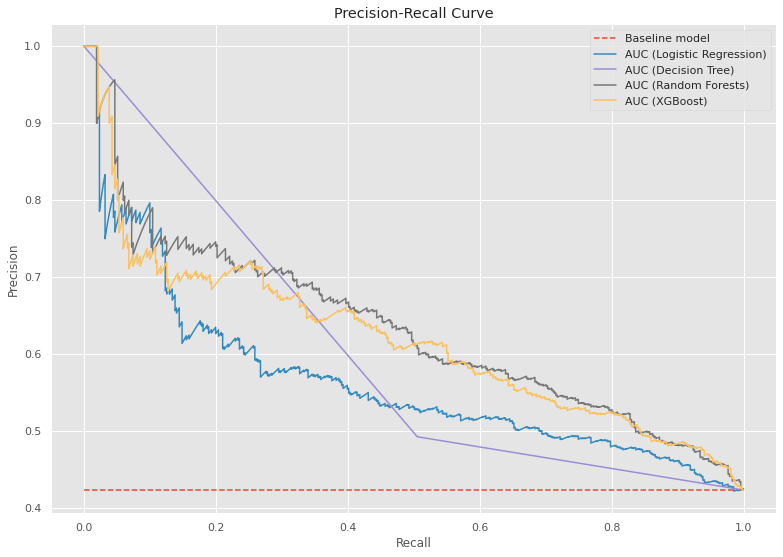

In [ ]:
# plot the Precision-Recall Curves for each model
plt.figure(figsize=(13, 9))
plt.plot([0, 1], [baseline_model, baseline_model], linestyle='--', label='Baseline model')
plt.plot(recall_lr, precision_lr, label='AUC (Logistic Regression)')
plt.plot(recall_dt, precision_dt, label='AUC (Decision Tree)')
plt.plot(recall_rf, precision_rf, label='AUC (Random Forests)')
plt.plot(recall_xgb, precision_xgb, label='AUC (XGBoost)')

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [ ]:
print(f'AUC of Logistic Regression: {auc_lr:.2f}')
print(f'AUC of Decision Tree: {auc_dt:.2f}')
print(f'AUC of Random Forest: {auc_rf:.2f}')
print(f'AUC of XGBoost: {auc_xgb:.2f}')

AUC of Logistic Regression: 0.56
AUC of Decision Tree: 0.60
AUC of Random Forest: 0.63
AUC of XGBoost: 0.62


- From the Precision-Recall Curves, we can see that the Randon Forest Model has the highest AUC values, whcih is 0.63. Same as the accuracy results, random forest model has the best fit for our dataset.

### Check the feature importance 


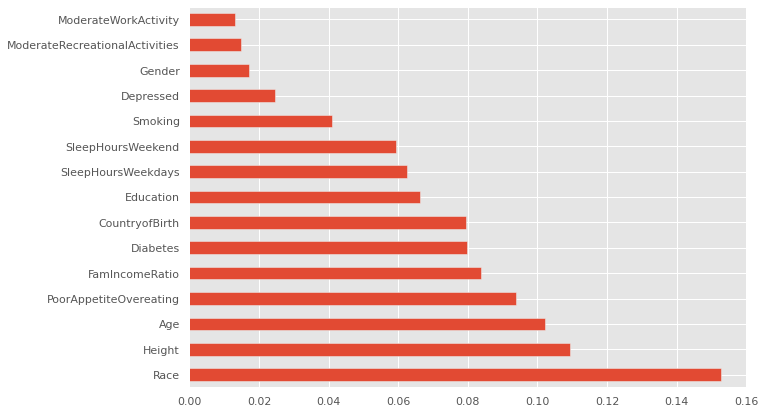

In [ ]:
plt.figure(figsize=(10,7))
feature_importances = pd.Series(bestmodel_3.feature_importances_, index=X.columns)
feature_importances.nlargest(20).plot(kind='barh');


- The most important five factors are Race, Height, Age, Eating Disorder, and Family income ratio.
- This five factors are important for predicting obesity status by using Random Forest model beside BMI and Weight. 
- In our literature reviews, we learned that depression can effecting obesity level based on avaliable studies. However, from our dataset and analysis, we found that feeling depressed may not be the top important features. But poor appetite or overeating as a part of mental health problem, it is effecting the obesity level. 